# Homework 02
### Alexander Looi
### Data Science I

In [356]:
# (do not modify this cell)

# allowed imports only (you may not need all of these)
import sys, os
import glob
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# make plots stay inside the notebook
%matplotlib inline

# Here I set up my work directory, make sure I'm in the correct directory, and also double check that 
# the correct files are in the directory
cur_dir = os.getcwd() # check to see if we're in the correct directory
cur_dir = "/Users/Looi/Google Drive/UVM/Classes/Fall 2017/Data_Science_I/HW02"
os.listdir() # list the files in the directory
data_dir = cur_dir + "/reports"
os.chdir(data_dir)
report_list = os.listdir() # get a list of all the reports
#print(report_list)

# Functions

In [73]:
# Right now this function also will load in the data center number id
def load_report(filename):
    """takes a string that is a name of a file and reads it into python"""
    file_contents = open(filename, mode = "r+")
    # create a new dictionary
    error2count = {}
    for l in file_contents:
        # split all the parts of the row up.
        row = l.split()
        # check to see if there is an empty row of just spaces. 
        # if the first entry in the row is empty ignore it.
        try:
            raw_char = row[0]
            # check to see if you can turn the last value of a row
            # into an integer/float, if you can add the data
            try:
                error_count = float(row[-1])
                # join together with a single space, the non numeric parts of the row
                row_name = " ".join(row[0:-1])
                row_name.strip(":")
                #print(row_name)
                error2count[row_name] = error_count
            except ValueError:
                pass
        except IndexError:
            pass
        # check to see that the rows and values are correnct
        #print(row_name, row[-1])
    # remove the data center key
    del error2count["DATACENTER"]
    # need to consolidate the Air Conditioning error types
    
    AC_keys = ["HVAC:","Air Con.:","A/C:"]
    
    for ac in AC_keys:
        try:
            error2count["HVAC:"] = error2count[ac]
            del error2count[ac]
        except KeyError:
            pass
    return error2count
# test on a couple of random .dat files
print(load_report("000001.dat"))
print(load_report("000153.dat"))

{'Fiber pipeline in:': 3.0, 'Power/generator reduction:': 0.0, 'Operator (employee) error:': 0.0, 'Power/generator loss:': 0.0, 'HVAC:': 5.0, 'Fiber pipeline out:': 1.0, 'Physical intrusion (person):': 0.0, 'Operator (non-employee) error:': 0.0, 'Physical intrusion (water):': 2.0, 'Misc. elec.:': 14.0}
{'Fiber pipeline in:': 5.0, 'Power/generator loss:': 0.0, 'Fiber pipeline out:': 5.0, 'Physical intrusion (person):': 0.0, 'Power/generator reduction:': 1.0, 'Operator (non-employee) error:': 0.0, 'Operator (employee) error:': 0.0, 'Misc. elec.:': 29.0, 'Physical intrusion (water):': 6.0}


[Define any of your other functions here, replacing this cell with descriptions of your functions as needed:]

In [143]:
# other functions:
# A function here to add in missing error modes to data centers that don't report certain error modes

def add_missing_em(data_center, keys):
    for k in keys:
        try:
            data_center[k]
        except KeyError:
            data_center[k] = 0
    return data_center
keys_test = load_report("000001.dat").keys()
add_missing_em(load_report("000153.dat"), keys_test)

{'Fiber pipeline in:': 5.0,
 'Fiber pipeline out:': 5.0,
 'HVAC:': 0,
 'Misc. elec.:': 29.0,
 'Operator (employee) error:': 0.0,
 'Operator (non-employee) error:': 0.0,
 'Physical intrusion (person):': 0.0,
 'Physical intrusion (water):': 6.0,
 'Power/generator loss:': 0.0,
 'Power/generator reduction:': 1.0}

# Problem 1


In [146]:
# grab all .dat files
r_list = glob.glob("*.dat")

# make a list of all error types in the files
all_error_types = []

error_dict = {}
datcen_dict = {}

for r in r_list:
    dat_errors = load_report(r)
    dat_keys = dat_errors.keys()
    error_keys = [d for d in dat_keys]
    #print(error_keys)
    # create a list of all the error types read in by the load report function.
    [all_error_types.append(ek) for ek in error_keys]
    # iterate through all the dictionary keys of each newly loaded error report
    # and sum all the different error types.
    datcen_dict[r] = dat_errors
    for et in dat_keys:
        try:
            error_dict[et] = error_dict[et] + dat_errors[et]
        except KeyError:
            error_dict[et] = dat_errors[et]

#print(all_error_types)
keys = set(all_error_types)


{'Fiber pipeline in:', 'Power/generator reduction:', 'Operator (employee) error:', 'Power/generator loss:', 'HVAC:', 'Fiber pipeline out:', 'Physical intrusion (person):', 'Operator (non-employee) error:', 'Physical intrusion (water):', 'Misc. elec.:'}


In [355]:
r_list = glob.glob("*.dat")
#print(r_list)

In [144]:
# code to check the .dat file name file numbers
dat_cen_num = [int(r.strip(".dat")) for r in r_list]
ran_num = range(0, dat_cen_num[-1]+1)
tot_dat_cen = len(set(dat_cen_num))
len(set(ran_num))

1431

4. The data numbers center numbers appear to be consistent. Consistent in this case means there are numbers go from 0 to 1430.

5. The data sets are not entirely consistent. My definition of consistent error modes simply means if error modes are the same and mean the same thing across data sets. Some data sets don't report zero values while others will, thus the error types listed between .dat files tend to differ. The "Operation Notes" also don't appear in each .dat file consistently either. In some files theis data appears at the top of the file and in others these data appear at the bottom of the file. Amongst the error type data, the biggest inconsistency is how air conditioning errors are reported. In files it is reported as either "A/C", "Air Con.", and "HVAC"; these file will need to combined. Curiously, there appear to be no errors as a result of "Power/Generator loss" or "Operator (employee) error"

6. The error counts appear consistent, in that they are all integers. In some cases it appears that instead of reporting the number zero a error mode will be left out. 

# Problem 2

1. Analyze these counts to report what are the different error modes and how often they occur. Do some data centers experience more errors than others? What is the typical number of errors a data center should expect? What are the most common types of errors experienced by data centers? Ask and answer at least two more questions of these data!

2. Being very careful as you interpret your analyses, what are the **riskiest** error modes in terms of shutting down data centers?

In [155]:
print(x_em)

{'Fiber pipeline in:': 0, 'Power/generator loss:': 0, 'HVAC:': 0, 'Fiber pipeline out:': 0, 'Physical intrusion (person):': 0, 'Power/generator reduction:': 0, 'Operator (non-employee) error:': 0, 'Misc. elec.:': 0, 'Physical intrusion (water):': 0, 'Operator (employee) error:': 0}


'Fiber pipeline in:'

In [169]:
# mean errors for each mode
mean_error_dict = {}
std_error_dict = {}
print("MEANS")
# calc the mean for each error model
for dk in error_dict.keys():
    mean_error_dict[dk] = error_dict[dk]/tot_dat_cen
    print(dk, mean_error_dict[dk])


# calc the standard deviation for each error model
x_em = {} # error counts for each error model for each
x = []
# add keys to x_em
for k in keys:
    x_em[k] = []
              
for dk in datcen_dict.keys():
    # if an error mode doesn't exits in a data center add it with a zero
    datcen_dict[dk] = add_missing_em(datcen_dict[dk], keys)
    for em in datcen_dict[dk].keys():
        # this shouldn't fail if the function add_missing_em has done its job
        x_em[em].append(datcen_dict[dk][em])
        x.append(datcen_dict[dk][em])
# check the data
#print(x_em)
print("\n")
# calc the standard deviation for the different error modes
print("STANARD DEVIATIONS")
for k in keys:
    std_em = np.std(x_em[k])
    std_error_dict[k] = std_em
    print(k, std_em)
print("\n")
print("Total mean", np.mean(x))
print("Total Errors", np.sum(x))
print("Total STD", np.std(x))
print("\n")
error_dict

MEANS
Fiber pipeline in: 29.770090845562542
Power/generator loss: 0.0
HVAC: 24.03913347309574
Fiber pipeline out: 8.551362683438155
Physical intrusion (person): 0.43116701607267643
Power/generator reduction: 5.424178895877009
Operator (non-employee) error: 3.1369671558350802
Misc. elec.: 149.73375262054506
Physical intrusion (water): 35.41858839972048
Operator (employee) error: 0.0


STANARD DEVIATIONS
Fiber pipeline in: 498.69810336
Power/generator reduction: 90.9487208689
Operator (employee) error: 0.0
Power/generator loss: 0.0
HVAC: 496.640992265
Fiber pipeline out: 141.984797502
Physical intrusion (person): 7.07803019888
Operator (non-employee) error: 52.3548818249
Physical intrusion (water): 440.314734224
Misc. elec.: 2521.99905064


Total mean 25.650524109
Total Errors 367059.0
Total STD 842.591403128




{'Fiber pipeline in:': 42601.0,
 'Fiber pipeline out:': 12237.0,
 'HVAC:': 34400.0,
 'Misc. elec.:': 214269.0,
 'Operator (employee) error:': 0.0,
 'Operator (non-employee) error:': 4489.0,
 'Physical intrusion (person):': 617.0,
 'Physical intrusion (water):': 50684.0,
 'Power/generator loss:': 0.0,
 'Power/generator reduction:': 7762.0}

In [354]:
# find which data centers are a standard deviation for total error modes for the entire time span.
list_dc = [] # list of data centers
list_tot_ec = [] # list of error counts

list_2std = []
for dc in datcen_dict.keys():
    dc_err_count = [] # count the total number errors in each data center
    for em in datcen_dict[dc].keys():
        err_num = datcen_dict[dc][em] # integer count of errors
        dc_err_count.append(err_num)
    tot_ec_dc = np.sum(dc_err_count) # total error count for a data center
    list_dc.append(dc)
    list_tot_ec.append(tot_ec_dc)
all_errorcount_dc = list(zip(list_tot_ec, list_dc))
all_errorcount_dc = sorted(all_errorcount_dc, reverse = True)
#print(list(all_errorcount_dc))
#print(all_errorcount_dc[0][0])
print("Data Center", " ", "# of stds")
for ec in all_errorcount_dc:
    # calc the number of standard deviations
    diff_mean = ec[0]-np.mean(x)
    num_std = diff_mean/np.std(x)
    if num_std > 2:
        print(ec[1], num_std)
        list_2std.append(ec)
        #print(ec[0])
tot_baddc=111967.0+105275.0+28322.0+14326.0+12979.0+10314.0+7398.0+6920.0+4057.0+2677.0+2179.0
percent_baddc = tot_baddc/367059.0
#print(percent_baddc)

Data Center   # of stds
000223.dat 132.853657253
000353.dat 124.911492196
000959.dat 33.5825281042
001357.dat 16.9718672927
000841.dat 15.3732276733
001386.dat 12.2103660656
001035.dat 8.74961392737
001176.dat 8.18231642323
000159.dat 4.78446547274
001092.dat 4.77853139843
000004.dat 3.14666096289
001114.dat 2.96507828897
000757.dat 2.55562716151


In the above code, the data centers where the number of error counts are greater than 2 standard deviations is printed. Here we see 3 data centers that are over 100 standard deviations greater than the mean! There are still more data centers that are 12 to 33 std greater than the mean and several in the 8, 4, 3, and 2 range. Interestingly, these are only 13 out of 1431 data centers (less than 1 percent). They also account for more than 83% of the errors in all of these error reports.

The total number of errors a data center can expect to get is about 25 errors for the time period. However, the distribution of the number of expected errors for the "mean data center" will vary depending on error mode. Also, there are several significant outliers which experience many different types of errors in addition to experiencing a lot of errors. The most common kind of error is the misc. electrical error, which makes sense because this kind of error encompasses the most different kinds of errors. Another thing to note is that these are not normal Guassian distributions because a lot of these error counts cannot be negative therefore a lot of these distributions are skewed and pulled to the "right" by data centers that experience a lot of errors.

The *riskiest* errors appear to be HVAC, misc. elec., Fiber pipeline in, Physical intrusion (water), and Fiber pipline out in that these are the errors that occur the most in terms of total count and mean count per data center. However, again, this is probably due to a number of outliers because the standard deviations for these three error modes are also high. 

In [200]:
# here I will look at the worse data centers for errors and see what kinds of errors as most numerous.
#print(list_2std)
for dc in list_2std:
    print("\n")
    print(dc[1])
    for d in datcen_dict[dc[1]].keys():
        print(d, datcen_dict[dc[1]][d])



000223.dat
Fiber pipeline in: 13341.0
Power/generator reduction: 2457.0
Operator (employee) error: 0.0
Power/generator loss: 0.0
HVAC: 13518.0
Fiber pipeline out: 3791.0
Physical intrusion (person): 184.0
Operator (non-employee) error: 1412.0
Physical intrusion (water): 9497.0
Misc. elec.: 67767.0


000353.dat
Fiber pipeline in: 12648.0
Power/generator reduction: 2278.0
Operator (employee) error: 0.0
Power/generator loss: 0.0
HVAC: 12483.0
Fiber pipeline out: 3596.0
Physical intrusion (person): 184.0
Operator (non-employee) error: 1315.0
Physical intrusion (water): 9075.0
Misc. elec.: 63696.0


000959.dat
Fiber pipeline in: 3407.0
Power/generator reduction: 626.0
Operator (employee) error: 0.0
Power/generator loss: 0.0
HVAC: 3421.0
Fiber pipeline out: 980.0
Physical intrusion (person): 46.0
Operator (non-employee) error: 350.0
Physical intrusion (water): 2476.0
Misc. elec.: 17016.0


001357.dat
Fiber pipeline in: 665.0
Physical intrusion (water): 9782.0
HVAC: 0
Power/generator loss: 

Just Looking at the raw data here it appears that misc. electrical problems is the biggest reason for error report counts followed by errors involving the pipline in, reduction in power out put and intrusion of water in the data centers with the most error mode counts.

# Problem 3


1. From the error reports, what data centers are most at risk due to flooding? Are some more at risk than others or is the risk of floods about the same across data centers. To answer this question, look at errors related to water compared with overall error rates. What proportion of the errors at each data center is due to water?

2. Rank the  *N*  data centers according to flood risk, from a rank of  *R=1*  (most at risk) to  *R=N* least at risk. Develop a visualization or other data presentation to display this information compactly. **[Bonus for ugrads/Required for grads]**: When ranking of data centers according to flood risk, incorporate uncertainty in your risk proportions. Determine how best to do this, and **justify** your analysis choices.

3. Rank data centers by their flood risk both with and without uncertainty, then determine an appropriate statistics for comparing how the *ranks* change.

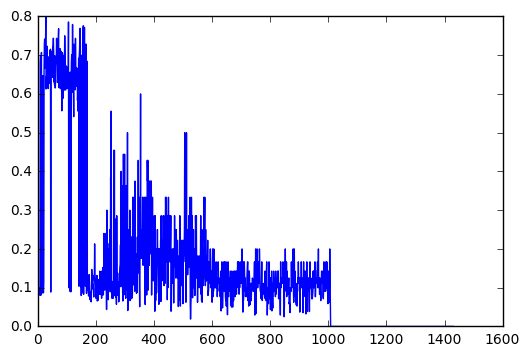

In [353]:
# compile only errors as a result of water related errors
water_intrusion = []
dc_names = []
all_errors = []
prop_water_errors = []
for dc in datcen_dict.keys():
    water_intrusion.append(datcen_dict[dc]["Physical intrusion (water):"])
    dc_names.append(dc)
    all_error_dc = []
    for ae in datcen_dict[dc].keys():
        all_error_dc.append(datcen_dict[dc][ae])
    all_errors.append(np.sum(all_error_dc))
    prop_water_errors.append(datcen_dict[dc]["Physical intrusion (water):"]/np.sum(all_error_dc))
    
h2o_errors = sorted(list(zip(water_intrusion, dc_names, prop_water_errors)), reverse = True)

# rank from most to least water related errors
ranks = np.array(range(0,len(water_intrusion)))+1
h2o_errors_rank = list(zip(list(ranks), h2o_errors))
h2o_ranks_raw = {}
h2p_prop_plot = []
for r in h2o_errors_rank:
    h2o_ranks_raw[r[1][1]] = r[0]
for r in h2o_errors:
    h2p_prop_plot.append(r[2])
#h2o_ranks_raw["000353.dat"]
# look at the raw rank based on simple counts of errors, 
# even if data centers have the same error count they will be forced into a seperate rank than the others
plt.plot(h2p_prop_plot)

From this plot we can see that the proportion of errors that are water related do not appear to scale with raw count error count rank. However, we can see that there are a large number of highly ranked data centers can get a lot proportion of their errors from water related errors. Also after about rank 1000, data centers do not seem to suffer from water related errors at all.

To incorporate uncertainty I will fit a poisson to each data center with its own error rate $\lambda$ (number of errors reported) and time interval $t$ (number of years error data was collected). I can then calc. the expected error rate over the given time period $N$ and uncertainty $\sqrt(N)$ and fit that into a confidence interval $N\pm1.96\sqrt{N}$. This will give me confidence intervals I can use to see how similar expected error counts are among data centers. 

In [337]:
# here create a poisson distribution for each data center with a mean and variance for each 
# if they have overlapping confidence intervals then they will share the same rank
dc_poisson = {}
for dc in datcen_dict.keys():
    dc_N = datcen_dict[dc]["Physical intrusion (water):"]
    dc_CIl = dc_N-1.96*np.sqrt(dc_N) # calc the lower bound CI
    dc_CIu = dc_N+1.96*np.sqrt(dc_N) # calc the upper bound CI
    # put the CI's in a dictionary with 
    dc_poisson[dc] = [dc_CIl, dc_CIu]
    
#print(dc_poisson)
# was going to attempt at normalizing things to the expected error count...
#avg_dc_N = np.mean(water_intrusion)
#avg_CI1 = avg_dc_N+1.96*np.sqrt(avg_dc_N)
#avg_CI2 = avg_dc_N-1.96*np.sqrt(avg_dc_N)

# a function to see if two intervals overlap
def overlap(CI1, CI2):
    if CI1[0] <= CI2[1] and CI2[0] <= CI1[1]:
        return True
    else:
        return False
dc_poisson2 = dc_poisson
rank_dict = {}
# loop through data centers and see if the confidence interval overlaps. If they do, they get the same 
# rank, and are removed from the list of data to loop through. Count the number of other data centers
# their CI overlaps. Here I am assuming that the more similar data sets have lower error rates
# from previous work done. 
overlaps_count = []
dc_keys = list(dc_poisson2.keys())
rank_count = 0
for dc in dc_keys:
    counter = 0
    rank_count += 1
    rank_name = "rank "+str(rank_count)
    rank_dict[rank_name] = []
    int1 = dc_poisson2[dc]
    for dc2 in dc_keys:
        # make sure I don't check the over lap the same data center
        if dc2==dc:
            pass
        else:
            int2 = dc_poisson2[dc2]
            if overlap(int1, int2):
                rank_dict[rank_name].append([dc2, int2])
                counter += 1
        #dc_keys.remove(dc2)
    overlaps_count.append(counter)

Here I am ranking by finding how many other data centers a particular data center overlaps with. This is assuming that the more data centers a data center over laps with, the less water related errors it has (this is based on earlier work where most data centers had few water related incidents). 

In [326]:
num_overlap = zip(overlaps_count, dc_keys)
num_overlap = sorted(list(num_overlap))
# count the number of occurances
uni_overlap = sorted(list(set(overlaps_count)))
print(uni_overlap)
counts_ol = []
rank = 1
dc_rank_num = []

for ol in uni_overlap:
    #print(ol)
    num_ol = overlaps_count.count(ol)
    counts_ol.append(num_ol)
    #print(num_ol, ol)
    for dc in num_overlap:
        if dc[0]==ol:
            dc_rank_num.append(rank)
    rank += 1
    
dc_ranks_uc = list(zip(dc_rank_num,num_overlap))
h2o_ranks_unc = {}

for r in dc_ranks_uc:
    h2o_ranks_unc[r[1][1]] = r[0]
#h2o_ranks_unc["000353.dat"]

[0, 1, 2, 3, 4, 5, 10, 23, 33, 49, 53, 55, 57, 60, 69, 72, 73, 74, 75, 76, 78, 81, 82, 85, 86, 87, 88, 90, 91, 93, 97, 98, 99, 100, 102, 103, 105, 106, 111, 112, 116, 118, 120, 121, 122, 124, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 221, 411, 412, 821, 826, 828, 830, 1122, 1219, 1230, 1235]


1

To find how the two different ranking systems differ, I'll try a "rank error", which will be defined as:
$\frac{(RR - UCR)^2}{N}$ where, $RR$ is the Raw Rank based on counts of errors, $UCR$ is the ranking incorporating uncertainty, and $N$ is the total number of data centers. This is essentially a difference squared rank, which penalizes high differences in rank.

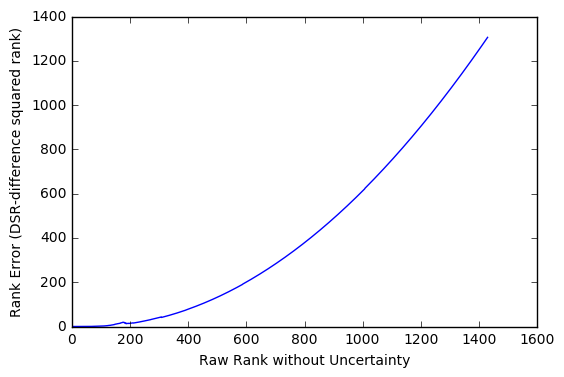

In [336]:
h2o_ranks_raw
h2o_ranks_unc
keys = h2o_ranks_unc.keys()
error_ranks = {}

error_rank_list = []
error_rank__raw_prev = []
error_rank__unc_prev = []
error_rank_dc = []
for k in keys:
    dc_ER = ((h2o_ranks_raw[k] - h2o_ranks_unc[k])**2)/len(keys)
    error_ranks[k] = dc_ER
    error_rank_list.append(dc_ER)
    error_rank__raw_prev.append(h2o_ranks_raw[k])
    error_rank__unc_prev.append(h2o_ranks_unc[k])
    error_rank_dc.append(k)
# print the error_ranks just to take a lil' look see
# print(error_ranks) 
plot_rank_error = sorted(list(zip(error_rank__raw_prev, error_rank_list, error_rank__unc_prev, error_rank_dc)))
# plot the error_ranks according to rank 

#plot_rank_error # make sure zipped data is properly ranked
error_rank_list_plot = []
for er in plot_rank_error:
    error_rank_list_plot.append(er[1])
plt.plot(error_rank_list_plot)
plt.xlabel("Raw Rank without Uncertainty")
plt.ylabel("Rank Error (DSR-difference squared rank)")

Here we can see that the lower ranked data centers (high risk of flooding) have really small changes in their rank while data centers with low risk of flooding have greater changes in their rank between the two rank methods I used. This is mainly because the "Raw Ranking" system, which bases rank on just raw count of water related errors does not account for similiarities between data centers and forces a different rank on each data center. My method using poisson CI and uncertainty accounts for potential similiarities. The potential similiarities allow for data centers to share the same rank as another data center. 